In [1]:
import pandas as pd

In [2]:
file_path = 'water_potability.csv'
water_data = pd.read_csv(file_path)

water_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
# Menampilkan informasi dasar tentang dataset
print(water_data.info())

# Menampilkan jumlah baris dan kolom
print(f'Jumlah baris: {water_data.shape[0]}, Jumlah kolom: {water_data.shape[1]}')

# Menampilkan nilai unik di setiap kolom
print(water_data.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None
Jumlah baris: 3276, Jumlah kolom: 10
ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: 

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cek missing values
print(water_data.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [5]:
# Mengganti missing values dengan rata-rata
water_data.fillna(water_data.mean(), inplace=True)

In [6]:
# Cek missing values
print(water_data.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


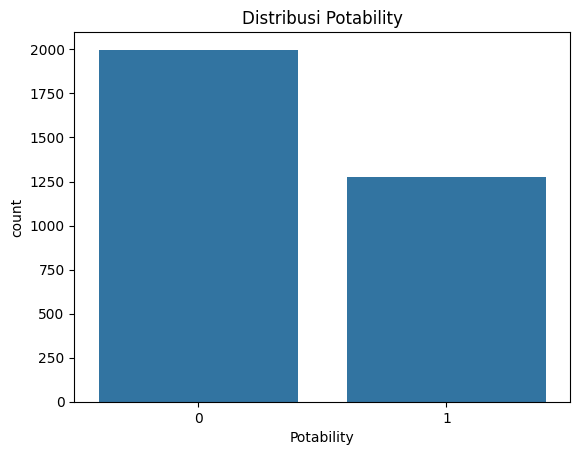

In [7]:
# Visualisasi distribusi data
sns.countplot(x='Potability', data=water_data)
plt.title('Distribusi Potability')
plt.show()

In [8]:
features = water_data.drop('Potability', axis=1)
target = water_data['Potability']

### Oversampling

In [9]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(features, target)

In [10]:
# Menghitung distribusi target
resampled_distribution = pd.Series(y_resampled).value_counts()
print(resampled_distribution)

Potability
0    1998
1    1998
Name: count, dtype: int64


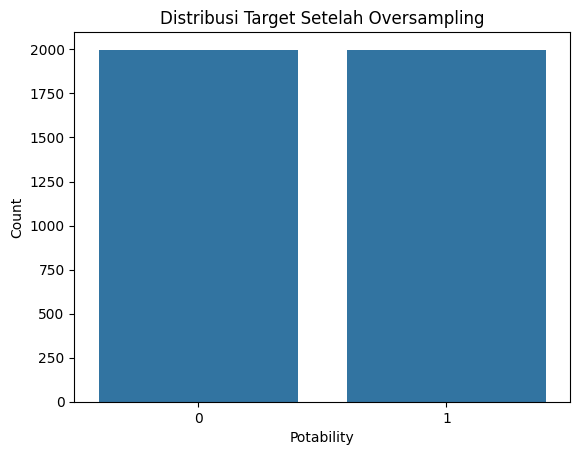

In [11]:
# Visualisasi distribusi data setelah oversampling
sns.countplot(x=y_resampled)
plt.title('Distribusi Target Setelah Oversampling')
plt.xlabel('Potability')
plt.ylabel('Count')
plt.show()

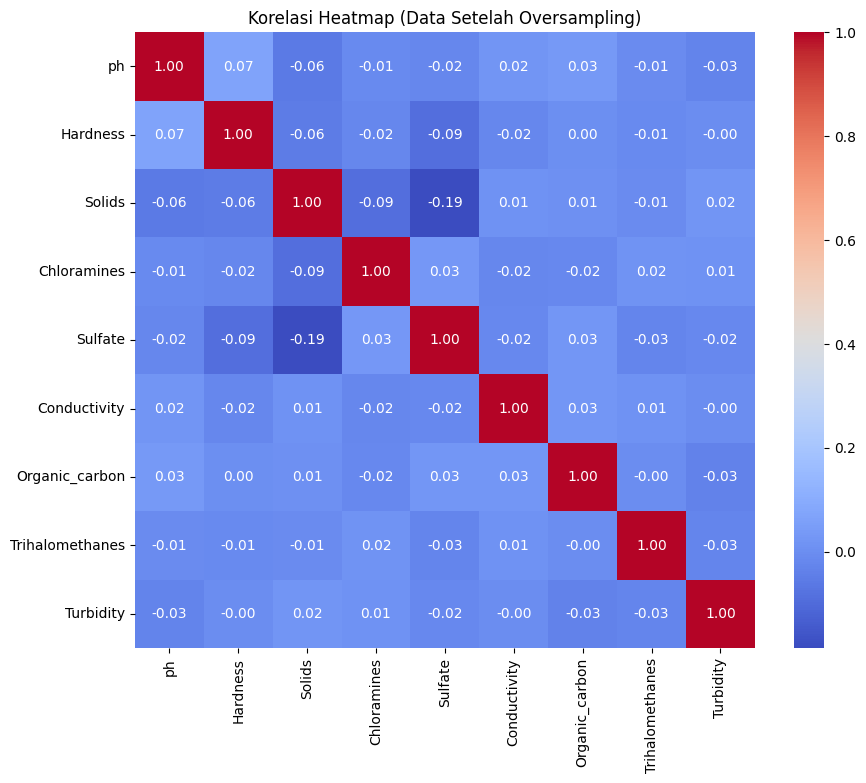

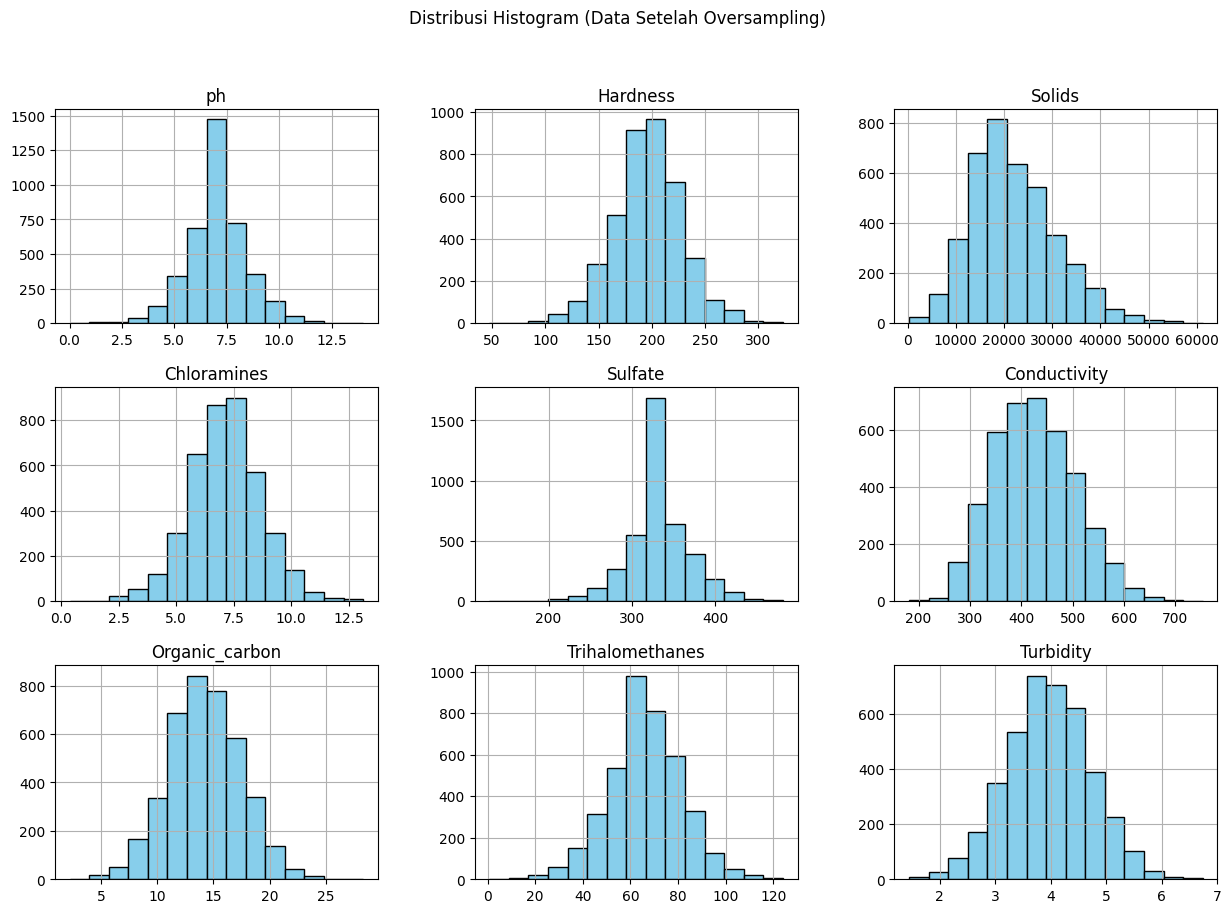

In [12]:
# Korelasi Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X_resampled.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korelasi Heatmap (Data Setelah Oversampling)')
plt.show()

# Distribusi Histogram Plot
X_resampled.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribusi Histogram (Data Setelah Oversampling)')
plt.show()

Random Forest Accuracy: 0.71


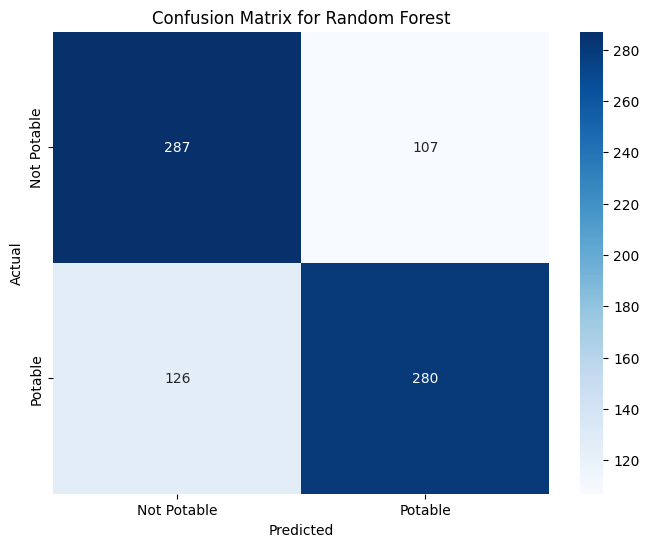

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.52


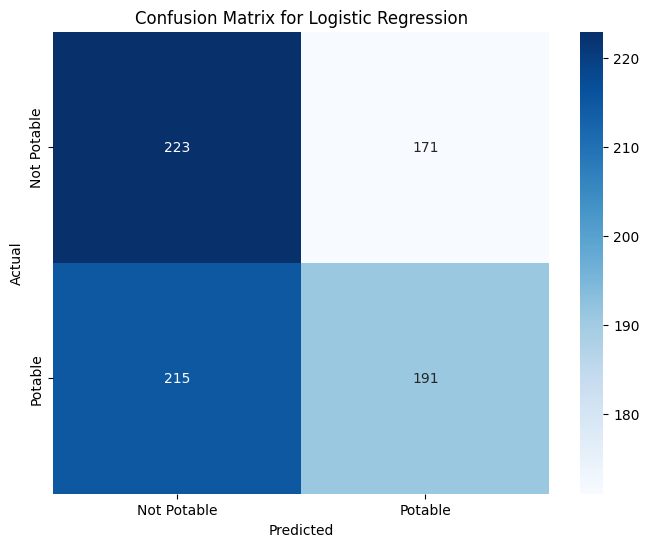

Support Vector Classifier Accuracy: 0.52


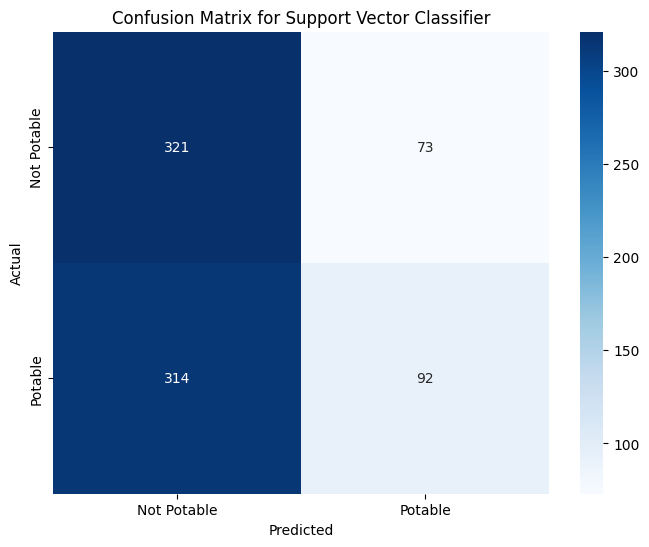

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Inisialisasi model
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Classifier': SVC()
}

# Melatih dan mengevaluasi setiap model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    
    # Menghitung confusion matrix
    cm = confusion_matrix(y_test, predictions)
    
    # Menampilkan hasil
    print(f'{name} Accuracy: {accuracy:.2f}')
    
    # Plotting confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [14]:
import pickle

# Simpan semua model ke dalam satu file
with open('models.pkl', 'wb') as file:
    pickle.dump(models, file)